In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [6]:
ds_train=pd.read_csv("/content/google.csv")
ds_train.head() #displaying first rows of dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [7]:
ds_train.head(-1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4425,2022-03-17,2662.979980,2681.610107,2643.699951,2676.780029,2676.780029,1413200
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800


In [8]:
training_set = ds_train.iloc[:,1:2].values

print(training_set)
print(training_set.shape)

[[  50.050049]
 [  50.555557]
 [  55.430431]
 ...
 [2722.030029]
 [2774.050049]
 [2784.      ]]
(4431, 1)


In [9]:
# Normalizing the dataset such that to make it fall in the range from 0 to 1

scaler= MinMaxScaler(feature_range=(0, 1))
scaled_training_set= scaler.fit_transform(training_set)

scaled_training_set

array([[1.36253641e-04],
       [3.06152003e-04],
       [1.94456941e-03],
       ...,
       [8.98173517e-01],
       [9.15657150e-01],
       [9.19001272e-01]])

In [10]:
# Dividing the training dataset into x_train and y_train data modules

X_train =[]
y_train=[]

for i in range(1000, 4429):
  X_train.append(scaled_training_set[i-1000:i, 0])
  y_train.append(scaled_training_set[i, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)

In [11]:
print(X_train.shape)
print(y_train.shape)

(3429, 1000)
(3429,)


In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(3429, 1000, 1)

In [13]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [14]:
regressor= Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [15]:
regressor.compile(optimizer='adam', loss= 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
108/108 [==============================] - 284s 3s/step - loss: 0.0062
Epoch 2/10
108/108 [==============================] - 270s 2s/step - loss: 0.0017
Epoch 3/10
108/108 [==============================] - 276s 3s/step - loss: 0.0015
Epoch 4/10
108/108 [==============================] - 277s 3s/step - loss: 0.0013
Epoch 5/10
108/108 [==============================] - 282s 3s/step - loss: 0.0014
Epoch 6/10
108/108 [==============================] - 284s 3s/step - loss: 0.0013
Epoch 7/10
108/108 [==============================] - 288s 3s/step - loss: 0.0012
Epoch 8/10
108/108 [==============================] - 288s 3s/step - loss: 0.0010
Epoch 9/10
108/108 [==============================] - 289s 3s/step - loss: 8.9234e-04
Epoch 10/10
108/108 [==============================] - 292s 3s/step - loss: 0.0011


In [16]:
ds_test=pd.read_csv("/content/google.csv")
actual_price= ds_train.iloc[:,1:2].values

In [17]:
ds_total=pd.concat((ds_train['Open'], ds_test['Open']), axis=0)
inputs=ds_total[len(ds_total)-len(ds_test)-1000:].values

inputs = inputs.reshape(-1, 1)
inputes=scaler.transform(inputs)

X_test = []
for i in range(1000, 2000):
  X_test.append(inputs[i-1000:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [18]:
predict_stock_price= regressor.predict(X_test)
predict_stock_price=scaler.inverse_transform(predict_stock_price)

32/32 [==============================] - 24s 700ms/step


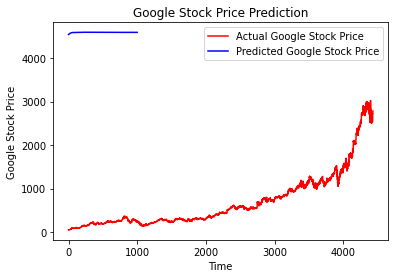

In [19]:
plt.plot(actual_price, color='red', label = 'Actual Google Stock Price')
plt.plot(predict_stock_price, color ='blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
